## Stock Price Prediction - Machine Learning Project in Python

### Reference - https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python/

In [91]:
import os
import pandas as pd
from zipfile import ZipFile
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import  matplotlib

In [79]:
input_path='C:\\Users\\jbhsm\\PycharmProjects\\Abhi_Thakur_prac\\input'

In [48]:
file_name = os.listdir(input_path)[0]
file_name

'NSE-Tata-Global-Beverages-Limited.zip'

In [81]:
os.getcwd()

'C:\\Users\\jbhsm\\PycharmProjects\\Abhi_Thakur_prac\\notebooks'

In [78]:
# Module to Extract file from a given path to a given path
def unzip_file(file_name,file_path, file_save_path):
    from zipfile import ZipFile
    
    with ZipFile(os.path.join(input_path,file_name), 'r') as zipObj:
        print("Extracting the following files...",zipObj.namelist())
        zipObj.extractall(file_save_path)    

In [80]:
unzip_file(file_name,input_path,input_path)

Extracting the following files... ['NSE-Tata-Global-Beverages-Limited.csv']


In [82]:
# Listing the input directory containing the data
os.listdir(input_path)

['NSE-Tata-Global-Beverages-Limited.csv',
 'NSE-Tata-Global-Beverages-Limited.zip']

In [85]:
# Reading the upzipped datafile

df_1=pd.read_csv(os.path.join(input_path,'NSE-Tata-Global-Beverages-Limited.csv'))
df_1.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [124]:
import copy
df_temp=copy.deepcopy(df_1)

In [126]:
df_temp.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [127]:
df_temp.drop(['Total Trade Quantity','Turnover (Lacs)'],axis=1,inplace=True)
df_temp.head()

,Date,Open,High,Low,Last,Close
0,2018-10-08,208.00,222.25,206.85,216.00,215.15
1,2018-10-05,217.00,218.60,205.90,210.25,209.20
2,2018-10-04,223.50,227.80,216.15,217.25,218.20
3,2018-10-03,230.00,237.50,225.75,226.45,227.60
4,2018-10-01,234.55,234.60,221.05,230.30,230.90


In [128]:
df_temp.sort_values(by="Date", inplace=True)

In [129]:
df_temp.head()

,Date,Open,High,Low,Last,Close
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45


In [130]:
df_temp["Date"]=pd.to_datetime(df_temp.Date)

In [131]:
df_temp.set_index("Date",inplace=True)

df_temp.head()

,Open,High,Low,Last,Close
Date,,,,,
2013-10-08,157.00,157.80,155.20,155.8,155.80
2013-10-09,155.70,158.20,154.15,155.3,155.55
2013-10-10,156.00,160.80,155.85,160.3,160.15
2013-10-11,161.15,163.45,159.00,159.8,160.05
2013-10-14,160.85,161.45,157.70,159.3,159.45


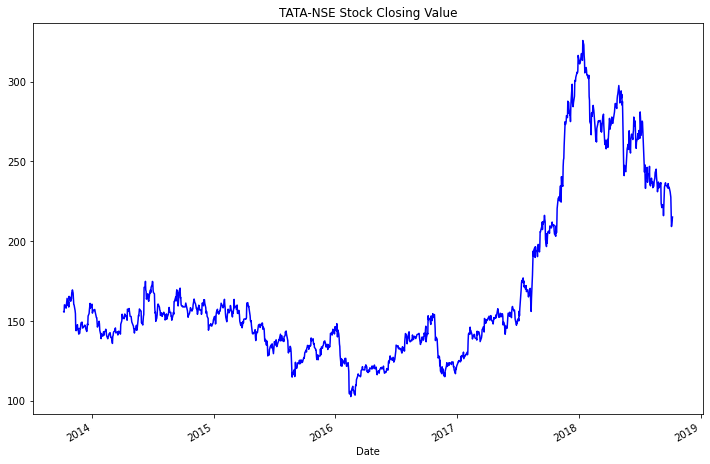

In [136]:
df_temp["Close"].plot(kind="line",color='b',figsize=(12,8))
plt.title("TATA-NSE Stock Closing Value")
plt.show()

In [105]:
df_temp.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [106]:
df_temp.isnull().sum()  # Their is no Null Values

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [107]:
df_temp.shape

(1235, 7)

In [172]:
## Preparing Train and Test Dataset
train=df_temp[:'2017']
test=df_temp['2018':]

### Thoughts:
    1. The time series does not look stationary. Order of differencing need to be understood
    2. Presence of stationarity could not be understood. (Seasonal Decomposition may give some idea) 

In [151]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [195]:
# Plotting the Auto Correlation graph to understand the order of differencing
def plot_acf_w_diff(df,no_of_diff,col_name):
    plt.rcParams.update({'figure.figsize':(9,12), 'figure.dpi':120})
    fig,ax=plt.subplots(no_of_diff+1,2,sharex=False)
    for i in range(0,no_of_diff+1):
        if i==0:
            ax[i,0].plot(df[col_name])
            ax[i,0].set_title("Original Series")
            plot_acf(df[col_name],ax=ax[i,1])
        else:
            ax[i,0].plot(df[col_name].diff(i).dropna())                         
            ax[i,0].set_title("Order {} differencing".format(i))
            plot_acf(df[col_name].diff(i).dropna(),ax=ax[i,1])
    plt.show()

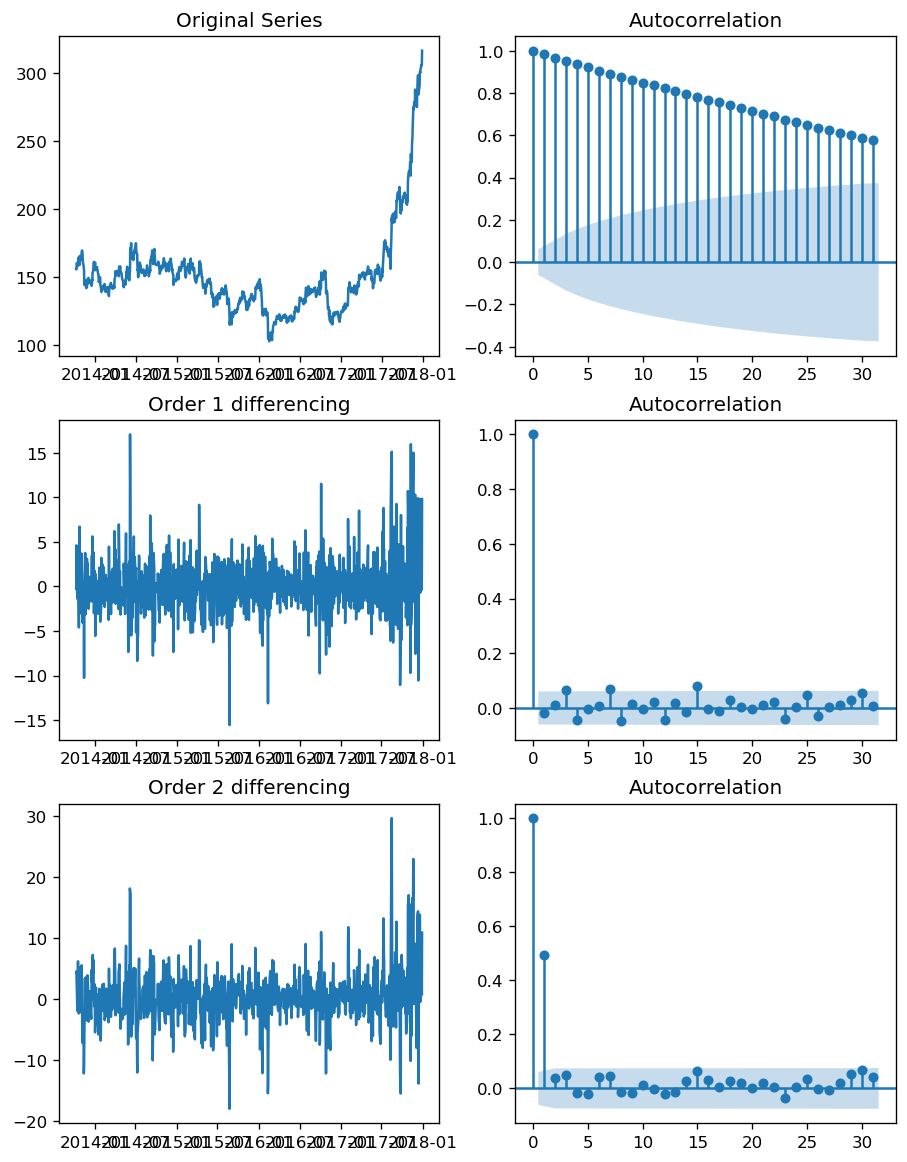

In [210]:
plot_acf_w_diff(train,2,"Close")

In [205]:
# plot_acf_w_diff(train_mon_mean,2,"Close")

### Thoughts
    1. Here we can see that, there is drastic fall on the Auto Correlation co-efficient of its lagged value. 
    2. Majority of the co-efficient is seen with in the significance zone.
    3. At differencing order 1 - No of lag required can be approximately determined to be 3.
    4. To be sure we need to conduct ADF test.
    5. ADf test with differecing 1, should prove the series to be stationary.
    6. No. of MA terms (q) can be found to be 3

In [158]:
def adf_test(time_sr):
    from statsmodels.tsa.stattools import adfuller
    result = adfuller (time_sr)
    adf_dict={"Test Statistic":result[0],"p-value":result[1],"Usedlag":result[2],"No.of Obs":result[3],
          "Critical Values at Sig. Level ":result[4]}
    print(adf_dict)

In [206]:
# ADF test of the stock close value without differenciation
adf_test(train["Close"])

{'Test Statistic': 2.7378418943747627, 'p-value': 0.9990880765219696, 'Usedlag': 15, 'No.of Obs': 1029, 'Critical Values at Sig. Level ': {'1%': -3.436720930946538, '5%': -2.8643528789984187, '10%': -2.56826769663245}}


In [213]:
# ADF test of the stock close value with 1st Order differenciation
adf_test(train["Close"].diff().dropna())

{'Test Statistic': -7.344674925642008, 'p-value': 1.0431300960129386e-10, 'Usedlag': 14, 'No.of Obs': 1029, 'Critical Values at Sig. Level ': {'1%': -3.436720930946538, '5%': -2.8643528789984187, '10%': -2.56826769663245}}


### Thoughts
    1. We can see from above, that p-value (1.043e-10) is less than 0.05, hence we can reject the null hypothesis(H0).
    2. We can say that the series is Stationary at 1st order differenciation. 
    3. We now need to be determine the order of AR co-effcients, using pacf

In [168]:
def plot_pacf_w_diff(df,no_of_diff,col_name):
    plt.rcParams.update({'figure.figsize':(11,12), 'figure.dpi':120})
    fig,ax=plt.subplots(no_of_diff+1,2,sharex=False)
    for i in range(0,no_of_diff+1):
        if i==0:
            ax[i,0].plot(range(0,df.shape[0]),df[col_name])
            ax[i,0].set_title("Original Series")
            plot_pacf(df[col_name],ax=ax[i,1])
        else:
            ax[i,0].plot(range(0,df[col_name].diff(i).dropna().shape[0]),df[col_name].diff(i).dropna())                         
            ax[i,0].set_title("Order {} differencing".format(i))
            plot_pacf(df[col_name].diff(i).dropna(),ax=ax[i,1])
    plt.show()

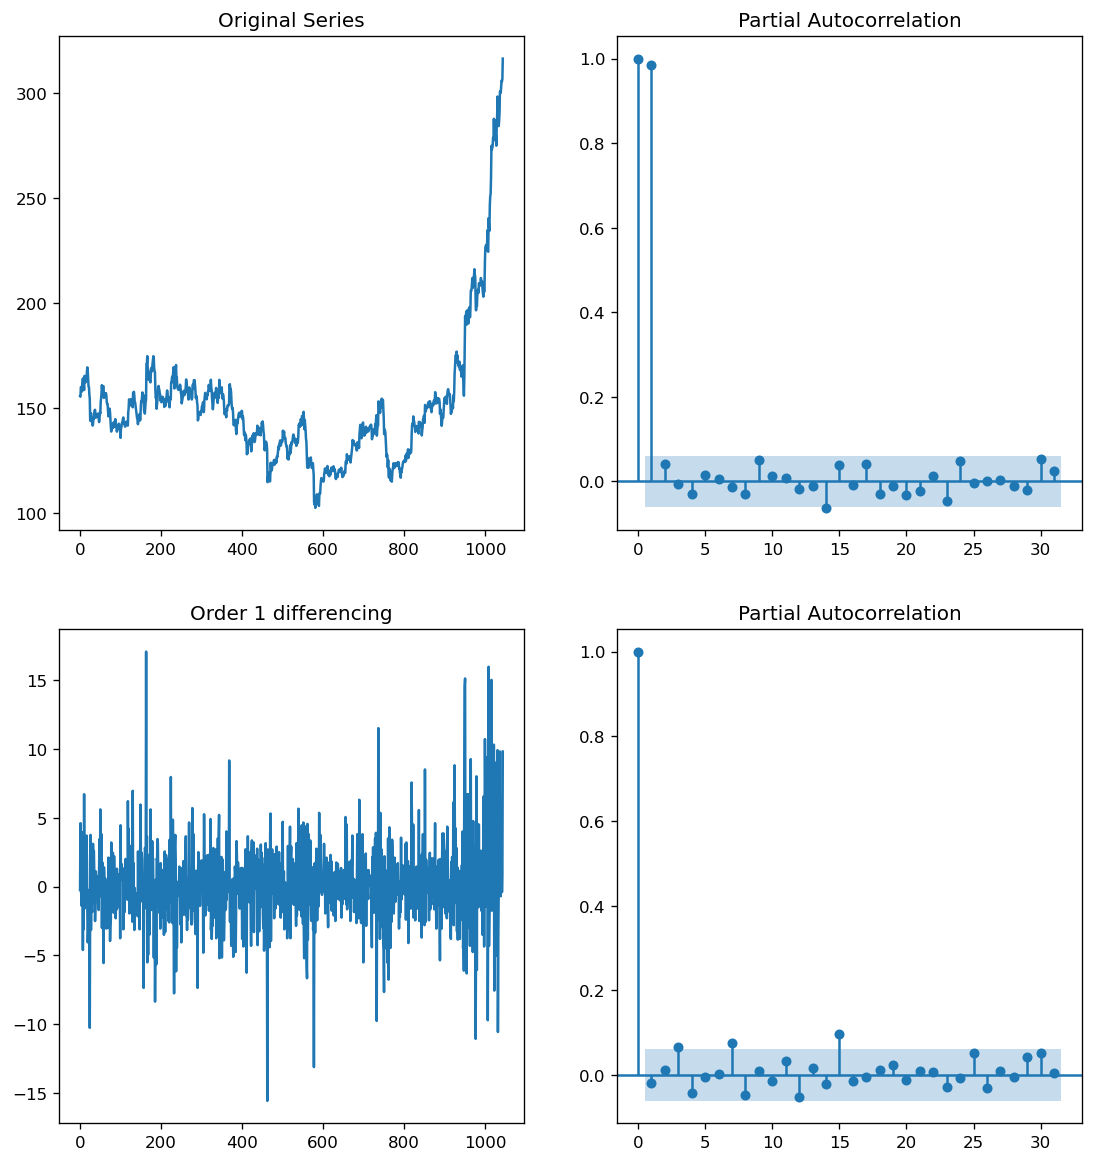

In [214]:
plot_pacf_w_diff(train,1,"Close")

### Thoughts
    1. Partial auto correlation after 1st order differencing (Stationary Series), we can see one co-effcient having value higher than the significant value.
    2. p - can be considered to be 3

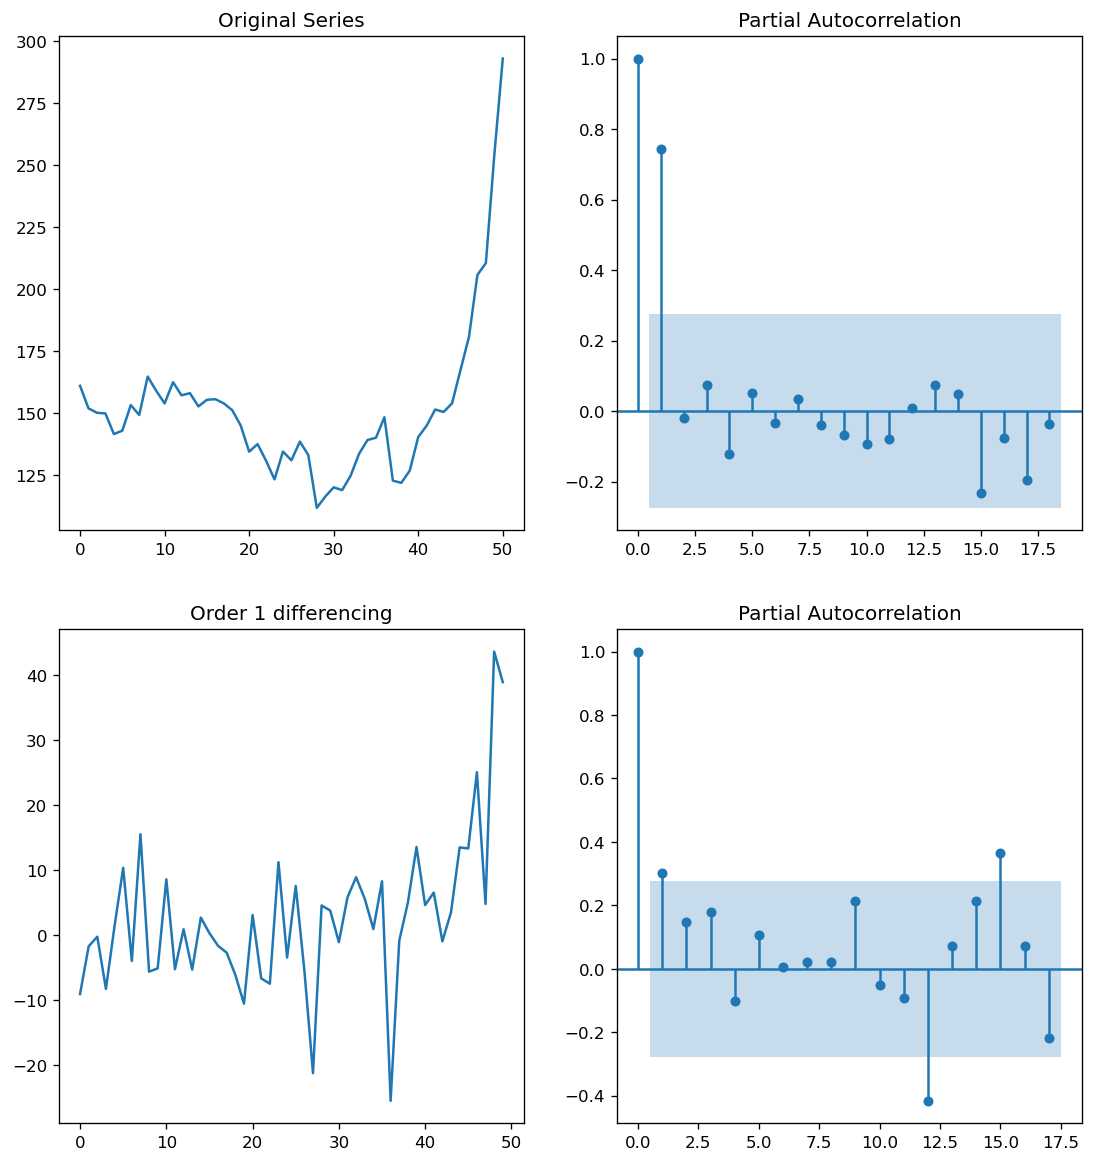

In [180]:
plot_pacf_w_diff(train_mon_mean,1,"Close")

### Weekwise Aggregation
    1. Lets take week wise mean of all values in the df and check Stationarity, ACF and PACF

In [270]:
train_week_mean=train.resample('W').mean()
train_week_mean.head()

,Open,High,Low,Last,Close
Date,,,,,
2013-10-13,157.4625,160.062500,156.0500,157.8000,157.887500
2013-10-20,160.7875,162.387500,158.3875,160.5375,160.925000
2013-10-27,162.4400,165.110000,159.3900,162.0300,161.900000
2013-11-03,164.5500,167.241667,162.8500,165.4250,165.308333
2013-11-10,165.2000,167.412500,161.4625,163.3000,162.900000


In [271]:
# ADF test of the stock close value without differenciation
adf_test(train_week_mean["Close"])

{'Test Statistic': 2.848816546139292, 'p-value': 1.0, 'Usedlag': 2, 'No.of Obs': 218, 'Critical Values at Sig. Level ': {'1%': -3.460707667106296, '5%': -2.874891213486339, '10%': -2.573885987711472}}


In [272]:
# ADF test of the stock close value with differenciation
adf_test(train_week_mean["Close"].diff(12).dropna())

{'Test Statistic': 1.2570631313810703, 'p-value': 0.9963573678605, 'Usedlag': 14, 'No.of Obs': 194, 'Critical Values at Sig. Level ': {'1%': -3.4645146202692527, '5%': -2.8765564361715534, '10%': -2.5747745328940375}}


In [273]:
for i in range(1,13):
    print("Order {} Differenciation \n".format(i))
    adf_test(train_week_mean["Close"].diff(i).dropna())
    print()

Order 1 Differenciation 

{'Test Statistic': -11.057181862590648, 'p-value': 4.911403261179962e-20, 'Usedlag': 0, 'No.of Obs': 219, 'Critical Values at Sig. Level ': {'1%': -3.460567372610299, '5%': -2.874829809033386, '10%': -2.573853225954421}}

Order 2 Differenciation 

{'Test Statistic': -1.748807296600461, 'p-value': 0.40615696991185796, 'Usedlag': 8, 'No.of Obs': 210, 'Critical Values at Sig. Level ': {'1%': -3.461878735881654, '5%': -2.875403665910809, '10%': -2.574159410430839}}

Order 3 Differenciation 

{'Test Statistic': 0.06283530754282332, 'p-value': 0.9634301516424228, 'Usedlag': 15, 'No.of Obs': 202, 'Critical Values at Sig. Level ': {'1%': -3.4631437906252636, '5%': -2.8759570379821047, '10%': -2.574454682874228}}

Order 4 Differenciation 

{'Test Statistic': -0.24840719541329118, 'p-value': 0.9325002287745858, 'Usedlag': 12, 'No.of Obs': 204, 'Critical Values at Sig. Level ': {'1%': -3.462818103072159, '5%': -2.8758145932936805, '10%': -2.574378674548251}}

Order 5 Dif

### Thoughts 
    1. Looking at the above values, we can see that even at 12th order differenciation, the series is NOT Stationary.
    2. Hence, better to use daywise data.

## Monthwise Aggregation

In [288]:
train_mon_mean=train.resample('M').mean()
train_mon_mean.head()

,Open,High,Low,Last,Close
Date,,,,,
2013-10-31,161.205882,163.464706,159.000000,161.073529,161.141176
2013-11-30,153.120000,155.315000,150.060000,152.352500,152.035000
2013-12-31,150.183333,152.245238,148.592857,150.223810,150.278571
2014-01-31,150.978261,152.743478,148.786957,150.006522,150.000000
2014-02-28,142.092105,143.336842,140.502632,141.765789,141.692105


In [289]:
for i in range(1,13):
    print("Order {} Differenciation \n".format(i))
    adf_test(train_mon_mean["Close"].diff(i).dropna())
    print()

Order 1 Differenciation 

{'Test Statistic': 0.9306485673072671, 'p-value': 0.9934775424656817, 'Usedlag': 11, 'No.of Obs': 38, 'Critical Values at Sig. Level ': {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}}

Order 2 Differenciation 

{'Test Statistic': 2.9047827142323843, 'p-value': 1.0, 'Usedlag': 8, 'No.of Obs': 40, 'Critical Values at Sig. Level ': {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625}}

Order 3 Differenciation 

{'Test Statistic': 1.0883909339448292, 'p-value': 0.9951163159186929, 'Usedlag': 9, 'No.of Obs': 38, 'Critical Values at Sig. Level ': {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}}

Order 4 Differenciation 

{'Test Statistic': 1.9046179790776123, 'p-value': 0.9985354124839387, 'Usedlag': 4, 'No.of Obs': 42, 'Critical Values at Sig. Level ': {'1%': -3.596635636000432, '5%': -2.933297331821618, '10%': -2.6049909750566895}}

Order 5 Differenciation 

{'Test Statistic': 1.2

### Thoughts 
    1. Looking at the above values, we can see that even at 12th order differenciation, the series is NOT Stationary.
    2. Hence, better to use daywise data.

In [227]:
from statsmodels.tsa.seasonal import seasonal_decompose

## Daywise

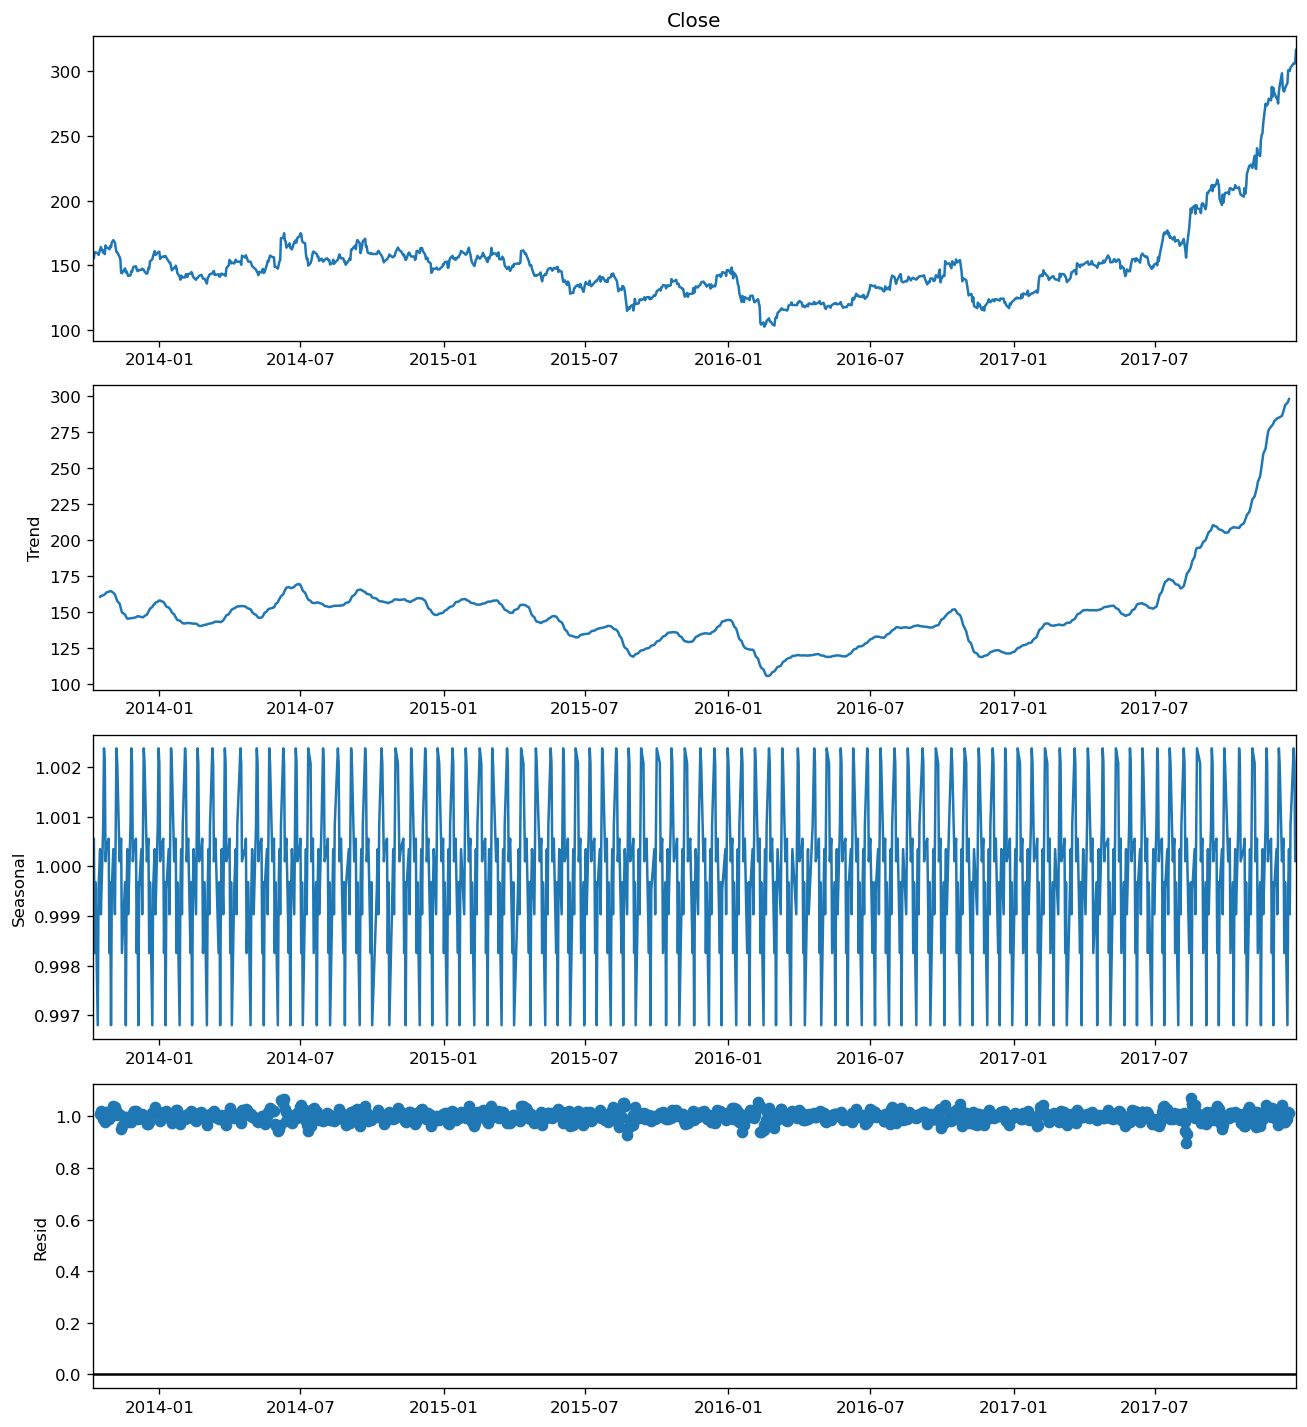

In [277]:
result_mul = seasonal_decompose(train["Close"],model='multiplicative',period=12)
result_mul.plot()
plt.show()

## Weekwise

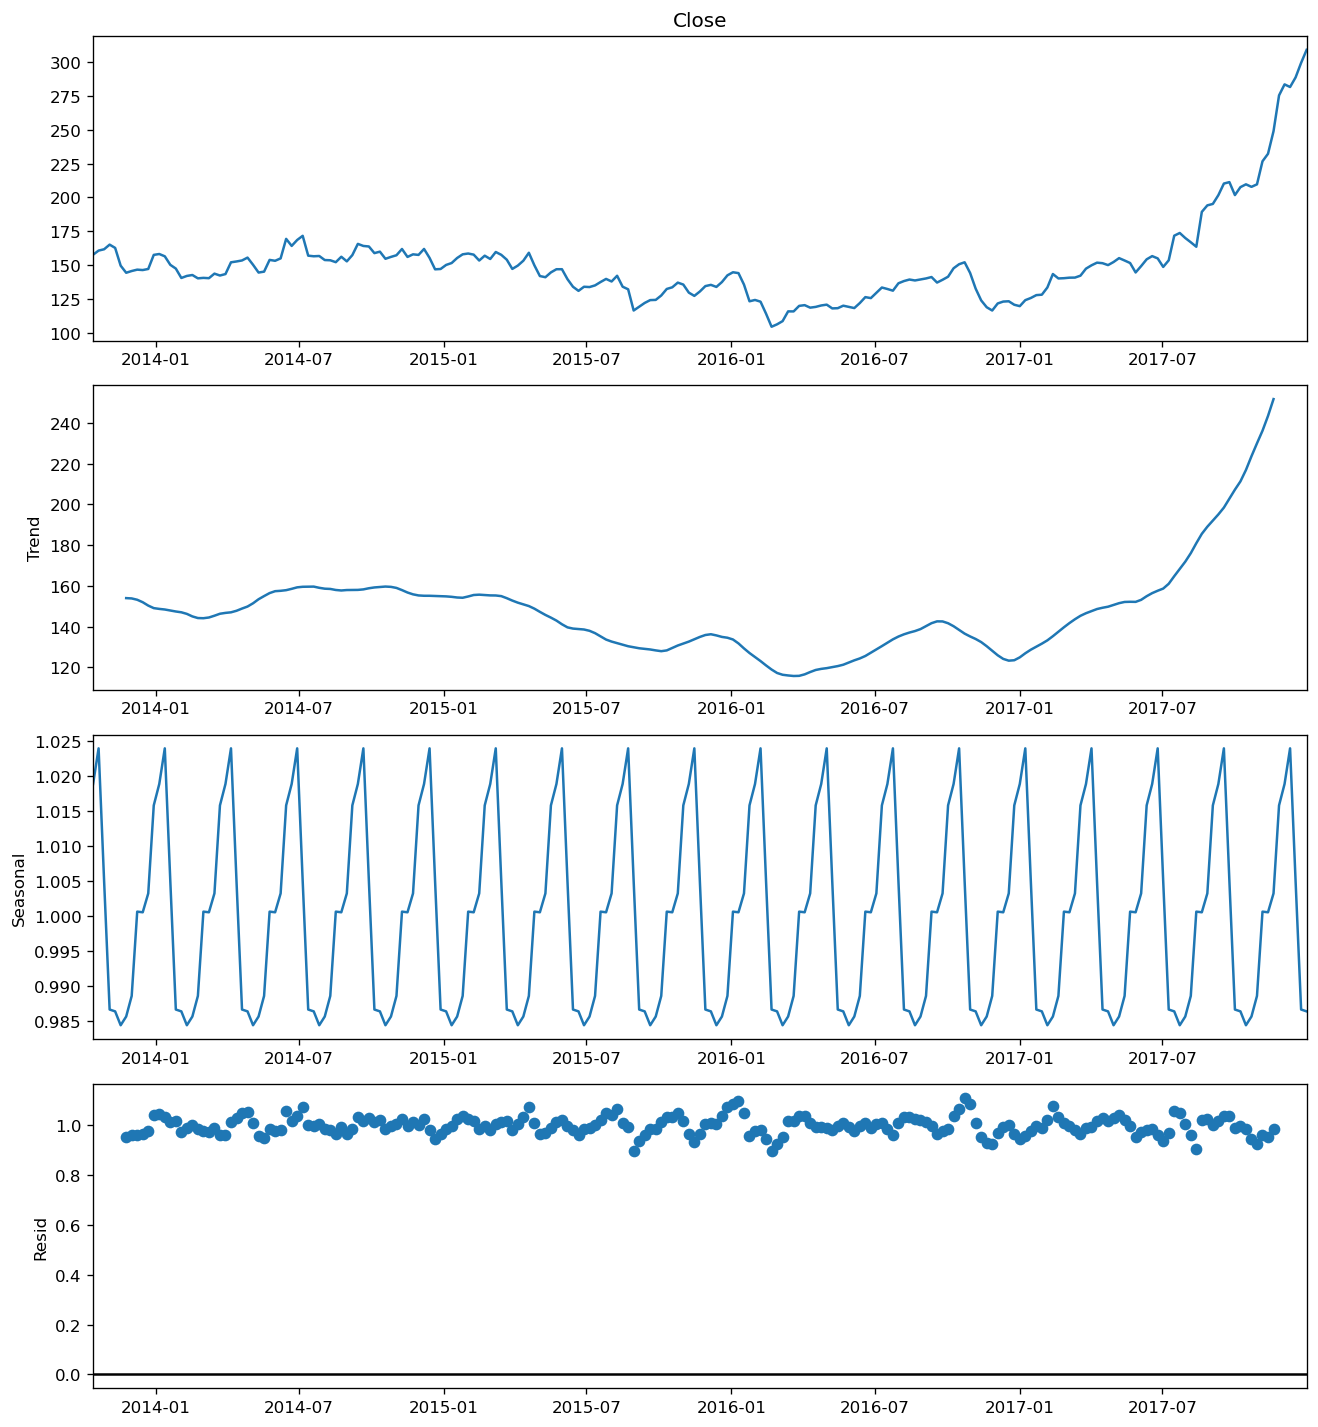

In [278]:
result_mul= seasonal_decompose(train_week_mean["Close"],model='multiplicative',period=12)
result_mul.plot()
plt.show()

## Monthwise

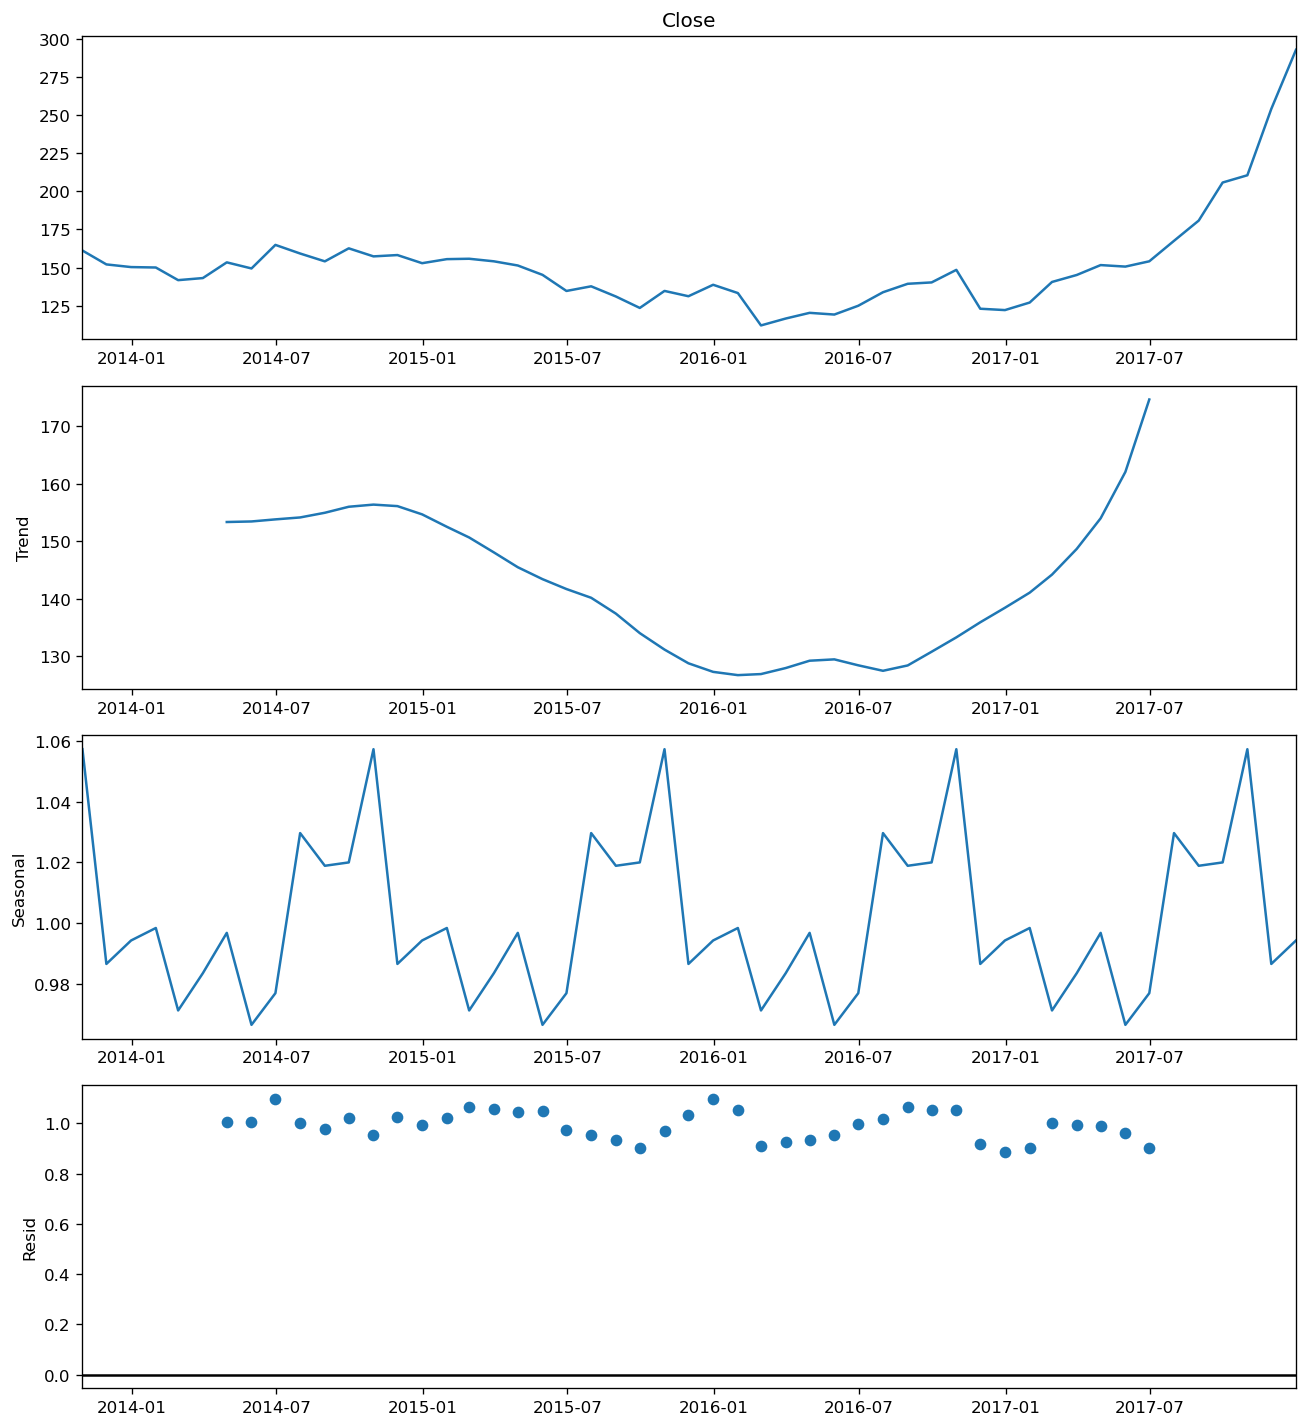

In [290]:
result_mul= seasonal_decompose(train_mon_mean["Close"],model='multiplicative',period=12)
result_mul.plot()
plt.show()

### Thoughts
    1. From above plots we can see that seasonal factor do exists.
    2. We'll go for SARIMA model and then with SARIMAX model to understand, if the model can be improved with the help of exogenous variables.   
    3.In weekwise and month we can see a repetitive pattern.

### SARIMA - To be modeled for Daywise, Weekwise and Monthwise

In [282]:
import pmdarima as pm

In [283]:
# SARIMAX Model - Daywise
sarima__day_model = pm.auto_arima(train[['Close']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sarima__day_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=11.75 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=7837.291, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=5641.262, Time=2.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=6928.603, Time=3.00 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=7858.347, Time=0.12 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=5949.379, Time=0.45 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=5546.084, Time=7.43 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=19.19 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=7.48 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=7835.281, Time=3.88 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=5548.078, Time=8.98 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=5548.079, Time=9.22 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=6927.993, Time=6.96 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=23.59 sec
 ARIMA(1,0,0)(2,1,0)[12]            

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1045
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -2768.692
Date:                            Tue, 19 Apr 2022   AIC                           5545.384
Time:                                    00:32:06   BIC                           5565.144
Sample:                                         0   HQIC                          5552.882
                                           - 1045                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9746      0.005    187.872      0.000       0.964       0.985
ar.S.L12      -0.6935      0.024    -29.010      0.000      -0.740      -0.647
ar.S.L24      -0.3225      0.027    -11.909      0.000      -0.376      -0.269
sigma2        12.3598      0.352     35.084      0.000      11.669      13.050
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               510.07
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.88   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [284]:
## Daywise SARIMA model AIC
sarima__day_model.aic()

5545.383575472032

In [285]:
# SARIMAX Model - Weekwise
sarima__week_model = pm.auto_arima(train_week_mean[['Close']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sarima__week_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.63 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1424.890, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1360.190, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1424.707, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1342.076, Time=0.57 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1328.175, Time=1.60 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1326.356, Time=0.59 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=1328.260, Time=1.94 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=1326.465, Time=1.15 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=5.24 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1336.486, Time=0.39 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=1327.294, Time=0.88 sec
 ARIMA(1,1,1)(1,1,1)[12]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  221
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -658.603
Date:                            Tue, 19 Apr 2022   AIC                           1325.205
Time:                                    00:33:16   BIC                           1338.556
Sample:                                         0   HQIC                          1330.603
                                            - 221                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2712      0.057      4.747      0.000       0.159       0.383
ar.S.L12      -0.0973      0.111     -0.878      0.380      -0.315       0.120
ma.S.L12      -0.8357      0.114     -7.361      0.000      -1.058      -0.613
sigma2        30.4421      1.987     15.318      0.000      26.547      34.337
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               127.92
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.77   Skew:                             0.71
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [286]:
## Weekwisewise SARIMA model AIC
sarima__week_model.aic()

1325.205365130364

In [291]:
# SARIMAX Model - Monthwise
sarima__mon_model = pm.auto_arima(train_mon_mean[['Close']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sarima__mon_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=332.167, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=311.600, Time=0.13 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=322.269, Time=0.05 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=308.177, Time=0.57 sec
 ARIMA(1,2,0)(2,1,1)[12]             : AIC=inf, Time=1.62 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.71 sec
 ARIMA(0,2,0)(2,1,0)[12]             : AIC=318.578, Time=0.38 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=308.433, Time=0.60 sec
 ARIMA(1,2,1)(2,1,0)[12]             : AIC=307.343, Time=0.70 sec
 ARIMA(1,2,1)(1,1,0)[12]             : AIC=310.503, Time=0.24 sec
 ARIMA(1,2,1)(2,1,1)[12]             : AIC=inf, Time=1.95 sec
 ARIMA(1,2,1)(1,1,1)[12]             : AIC=inf, Time=0.95 sec
 ARIMA(0,2,1)(2,1,0)[12]             : AIC=306.167, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   51
Model:             SARIMAX(0, 2, 1)x(2, 1, [], 12)   Log Likelihood                -149.083
Date:                             Tue, 19 Apr 2022   AIC                            306.167
Time:                                     00:34:48   BIC                            312.611
Sample:                                          0   HQIC                           308.439
                                              - 51                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6725      0.163     -4.125      0.000      -0.992      -0.353
ar.S.L12      -1.0984      0.217     -5.051      0.000      -1.525      -0.672
ar.S.L24      -0.5137      0.273     -1.880      0.060      -1.049       0.022
sigma2       117.1230     51.751      2.263      0.024      15.694     218.552
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):                 0.47
Prob(Q):                              0.43   Prob(JB):                         0.79
Heteroskedasticity (H):               3.00   Skew:                             0.03
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [292]:
## Monthwisewise SARIMA model AIC
sarima__mon_model.aic()

306.1669063943913

### Thoughts
    1. Monthwise aggregated model has lowest AIC - 306.17
    2. Weekwise aggregated model has AIC - 1325.20
    2. Daywise prediction is not possible, because values are available for week days, so either monthwise or weekwise aggregation to be used, where we need generate the prediction period

In [301]:
import numpy as np

In [293]:
test_day_wise=test
test_week_wise=test.resample('W').mean()
test_month_wise=test.resample('M').mean()

In [294]:
print(test.shape,test_week_wise.shape,test_month_wise.shape)

(190, 5) (41, 5) (10, 5)


In [296]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
   
    return(mape,mae,rmse)

In [319]:
def plot_eval_prediction(model,trn_df,tst_df,freq):
    period=tst_df.shape[0]
    fitted,conf_int=model.predict(n_periods=period,return_conf_int=True)
    index_fc=tst_df.index
    fitted_sr=pd.Series(fitted,index=index_fc)
    lower_ci=pd.Series(conf_int[:,0],index=index_fc)
    upper_ci=pd.Series(conf_int[:,1],index=index_fc)
    
    # Plotting Data
    plt.figure(figsize=(12,8))
    plt.plot(trn_df["Close"])
    plt.plot(tst_df["Close"],color="red",label="Actual")
    plt.plot(fitted_sr,color="darkgreen",label="Predicted")
    plt.fill_between(lower_ci.index, 
                 lower_ci, 
                 upper_ci, 
                 color='k', alpha=.15)
    
    plt.title("SARIMA - Final Prediction of NSE TATA Stock Closing price - Frequency {}".format(freq))
    plt.legend()
    plt.show()
    
    mape,mae,rmse=forecast_accuracy(fitted_sr.values,tst_df["Close"])
    
    print("MAPE: ",round(mape,3))
    print("Accuracy: ",round(1-mape,3))
    print("MAE: ",round(mae,3))
    print("RMSE: ",round(rmse,3))
    
    

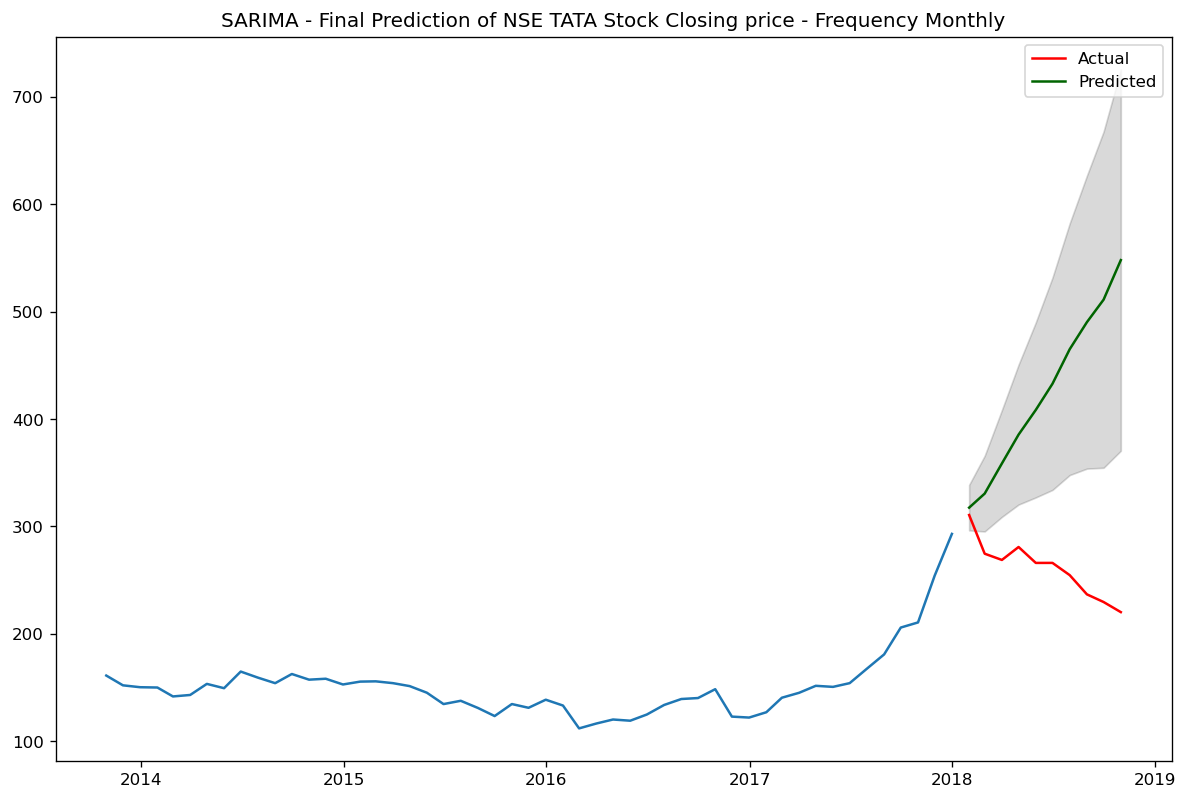

MAPE:  0.671
Accuracy:  0.329
MAE:  163.996
RMSE:  191.213


In [320]:
plot_eval_prediction(sarima__mon_model,train_mon_mean,test_month_wise,"Monthly")

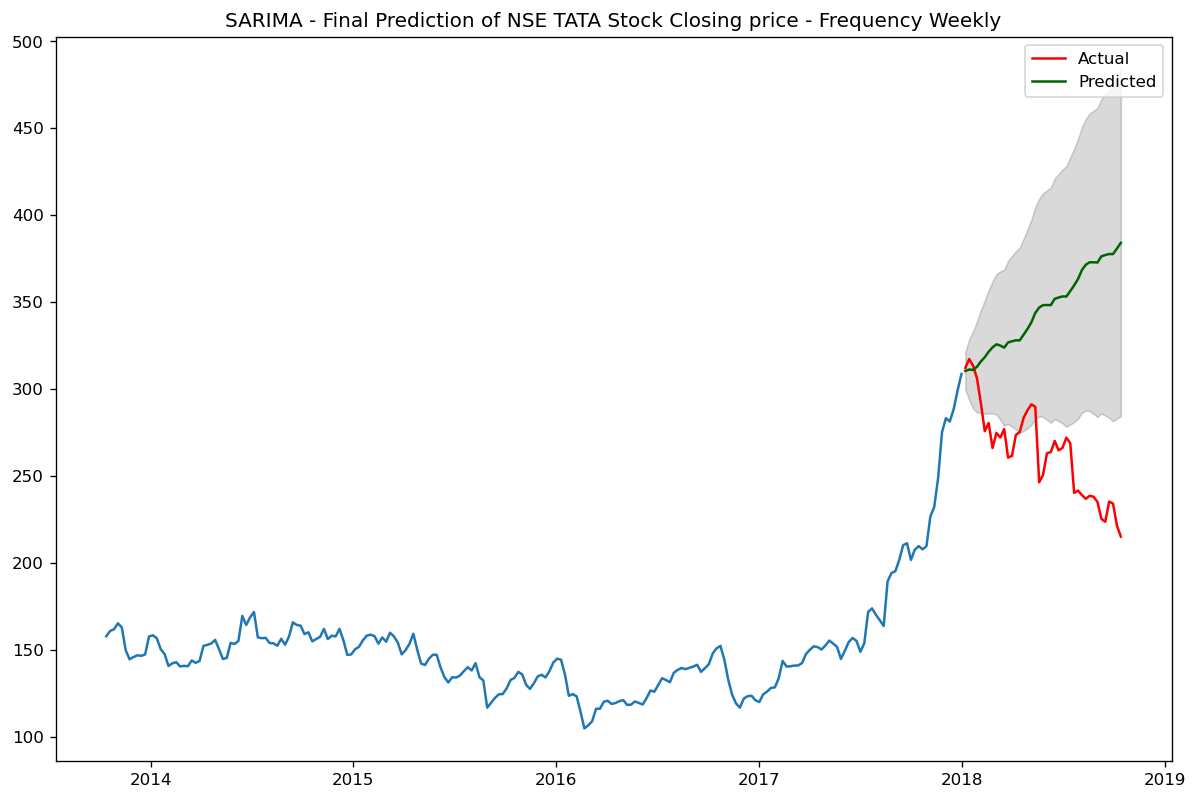

MAPE:  0.334
Accuracy:  0.666
MAE:  82.684
RMSE:  94.911


In [321]:
plot_eval_prediction(sarima__week_model,train_week_mean,test_week_wise,"Weekly")

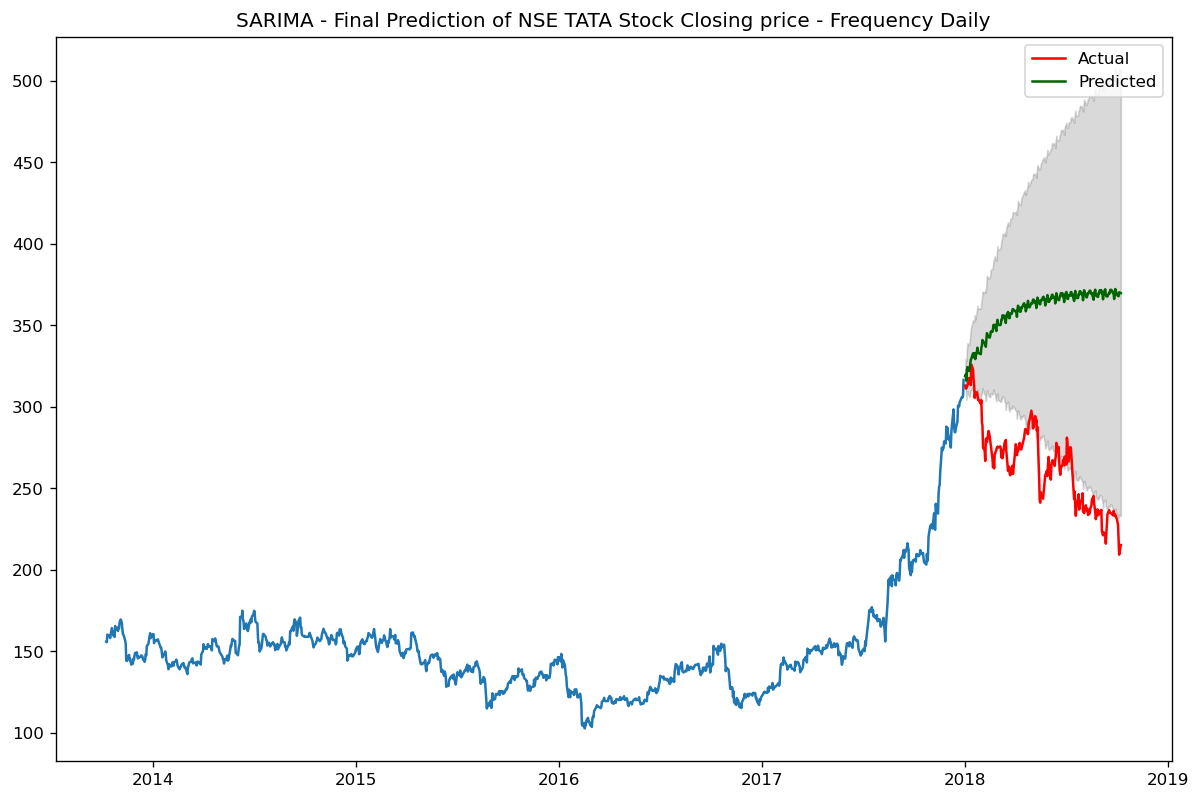

MAPE:  0.372
Accuracy:  0.628
MAE:  94.105
RMSE:  101.122


In [322]:
plot_eval_prediction(sarima__day_model,train,test,"Daily")

## Thoughts
    1. Weekwise aggregation gives the lowest MAPE and highest accuracy of 66.6%
    2. The model may be improved thru incorporation of exogenous variables - to make it a multivariate analysis.

## SARIMAX

In [323]:
test.columns

Index(['Open', 'High', 'Low', 'Last', 'Close'], dtype='object')

In [359]:
result_mul_daywise = seasonal_decompose(train[['Close']],model='multiplicative',period=12,extrapolate_trend='freq')
seasn_daywise = result_mul_daywise.seasonal

In [365]:
seasn_daywise=pd.DataFrame(seasn_daywise).reset_index()

In [368]:
seasn_daywise[['seasonal']].values

array([[1.00059928],
       [1.00024744],
       [0.99826991],
       ...,
       [1.00216968],
       [1.00020655],
       [1.00059928]])

In [367]:
# SARIMAX Model - Daywise
sarima__day_model = pm.auto_arima(train[['Close']], exogenous=seasn_daywise[['seasonal']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sarima__day_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=16.62 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=7839.291, Time=0.20 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=5643.262, Time=2.75 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=6930.603, Time=3.92 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=7860.347, Time=1.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=5951.379, Time=0.61 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=5548.084, Time=9.86 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=26.99 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=10.20 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=7837.281, Time=6.02 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=5550.078, Time=11.85 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=5550.079, Time=11.76 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=6929.993, Time=9.38 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=31.40 sec
 ARIMA(1,0,0)(2,1,0)[12]         

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1045
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -2768.692
Date:                            Tue, 19 Apr 2022   AIC                           5547.384
Time:                                    02:48:22   BIC                           5572.085
Sample:                                         0   HQIC                          5556.757
                                           - 1045                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
seasonal   -6.758e-06   1.58e+04  -4.27e-10      1.000    -3.1e+04     3.1e+04
ar.L1          0.9746      0.005    187.868      0.000       0.964       0.985
ar.S.L12      -0.6935      0.024    -28.997      0.000      -0.740      -0.647
ar.S.L24      -0.3225      0.027    -11.907      0.000      -0.376      -0.269
sigma2        12.3598      0.352     35.075      0.000      11.669      13.050
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               510.07
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.88   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [381]:
sarima__day_model.aic()

5547.3835754710635

In [347]:
seasn_daywise=pd.DataFrame(seasn_daywise).reset_index()

In [405]:
def sarimax_plot_eval_prediction(model,trn_df,tst_df,exogen_data,seasonal_freq,freq):
    period=tst_df.shape[0]
    #prepof exogenous data
    no_of_repeat=(tst_df.shape[0])//seasonal_freq
    addin_period=(tst_df.shape[0])%seasonal_freq
    no_of_repeat_dt=np.tile(exogen_data[["seasonal"]][-seasonal_freq:].values,no_of_repeat).reshape(-1,1)
    add_period_dt=exogen_data[["seasonal"]][:addin_period].values
    exogn_dt=np.append(no_of_repeat_dt,add_period_dt,0)
    
    
    fitted,conf_int=model.predict(n_periods=period,exogenous=exogn_dt,return_conf_int=True)
    index_fc=tst_df.index
    fitted_sr=pd.Series(fitted,index=index_fc)
    lower_ci=pd.Series(conf_int[:,0],index=index_fc)
    upper_ci=pd.Series(conf_int[:,1],index=index_fc)
    
    # Plotting Data
    plt.figure(figsize=(12,8))
    plt.plot(trn_df["Close"])
    plt.plot(tst_df["Close"],color="red",label="Actual")
    plt.plot(fitted_sr,color="darkgreen",label="Predicted")
    plt.fill_between(lower_ci.index, 
                 lower_ci, 
                 upper_ci, 
                 color='k', alpha=.15)
    
    plt.title("SARIMA - Final Prediction of NSE TATA Stock Closing price - Frequency {}".format(freq))
    plt.legend()
    plt.show()
    
    mape,mae,rmse=forecast_accuracy(fitted_sr.values,tst_df["Close"])
    
    print("MAPE: ",round(mape,3))
    print("Accuracy: ",round(1-mape,3))
    print("MAE: ",round(mae,3))
    print("RMSE: ",round(rmse,3))

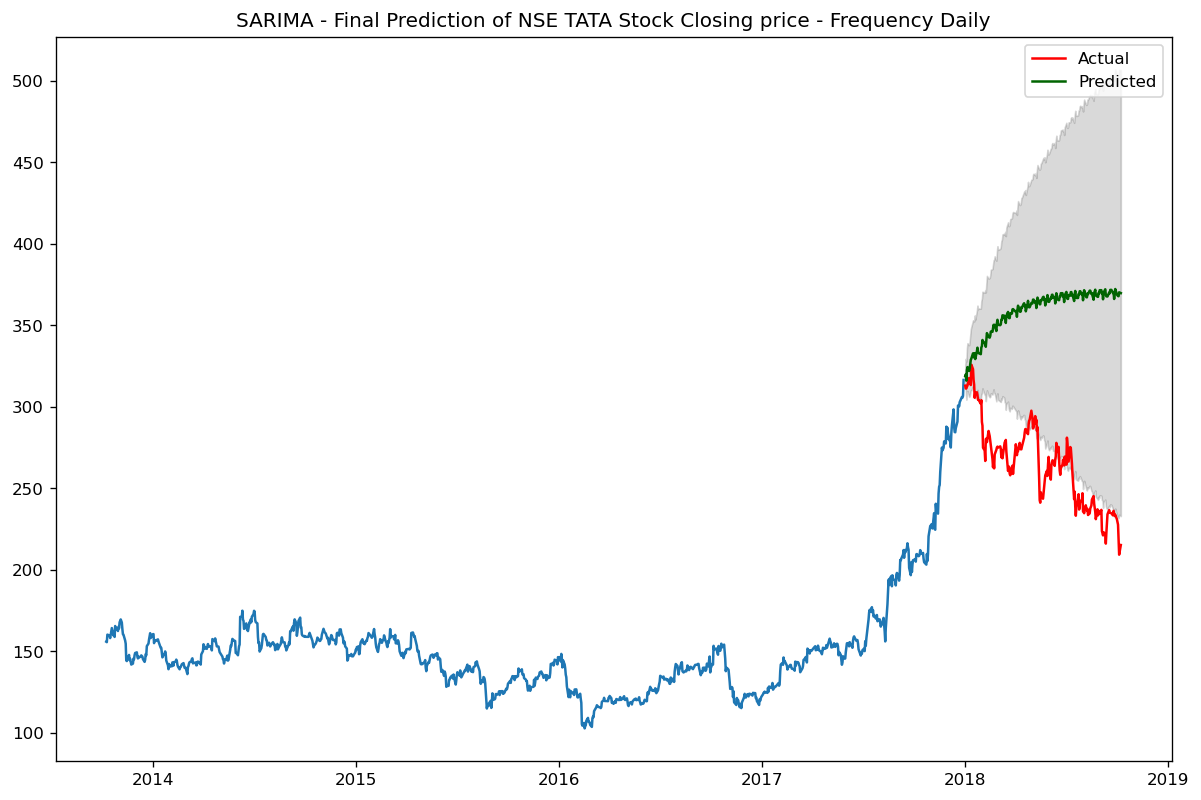

MAPE:  0.372
Accuracy:  0.628
MAE:  94.105
RMSE:  101.122


In [406]:
sarimax_plot_eval_prediction(sarima__day_model,train,test,seasn_daywise[["seasonal"]],12,"Daily")

In [407]:
result_mul_weekwise = seasonal_decompose(train_week_mean[['Close']],model='multiplicative',period=12,extrapolate_trend='freq')
seasn_weekwise = result_mul_weekwise.seasonal

In [408]:
seasn_weekwise=pd.DataFrame(seasn_weekwise).reset_index()

In [409]:
# SARIMAX Model - Weekwise
sarima__week_model = pm.auto_arima(train_week_mean[['Close']], exogenous=seasn_weekwise[['seasonal']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sarima__week_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.97 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1895.878, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1683.283, Time=1.54 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1907.845, Time=0.26 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1684.656, Time=0.48 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=1678.930, Time=2.30 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1682.305, Time=1.39 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=1678.392, Time=3.95 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=1679.231, Time=3.18 sec
 ARIMA(0,0,1)(2,1,2)[12] intercept   : AIC=inf, Time=4.76 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=1674.958, Time=5.39 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1677.731, Time=4.07 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=1867.112, Time=3.02 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  221
Model:             SARIMAX(0, 0, 3)x(0, 1, [1, 2], 12)   Log Likelihood                -754.370
Date:                                 Tue, 19 Apr 2022   AIC                           1524.739
Time:                                         03:17:26   BIC                           1551.478
Sample:                                              0   HQIC                          1535.550
                                                 - 221                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.1995      2.760      2.246      0.025       0.790      11.609
seasonal      -0.0002   3.75e+04  -4.82e-09      1.000   -7.35e+04    7.35e+04
ma.L1          1.4126      0.043     32.905      0.000       1.328       1.497
ma.L2          1.1182      0.065     17.226      0.000       0.991       1.245
ma.L3          0.4612      0.048      9.547      0.000       0.367       0.556
ma.S.L12      -0.2642      0.087     -3.031      0.002      -0.435      -0.093
ma.S.L24       0.1602      0.114      1.400      0.162      -0.064       0.385
sigma2        78.5617      6.469     12.145      0.000      65.884      91.240
===================================================================================
Ljung-Box (L1) (Q):                   5.50   Jarque-Bera (JB):               148.59
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               2.26   Skew:                             1.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [410]:
sarima__week_model.aic()

1524.7390257434874

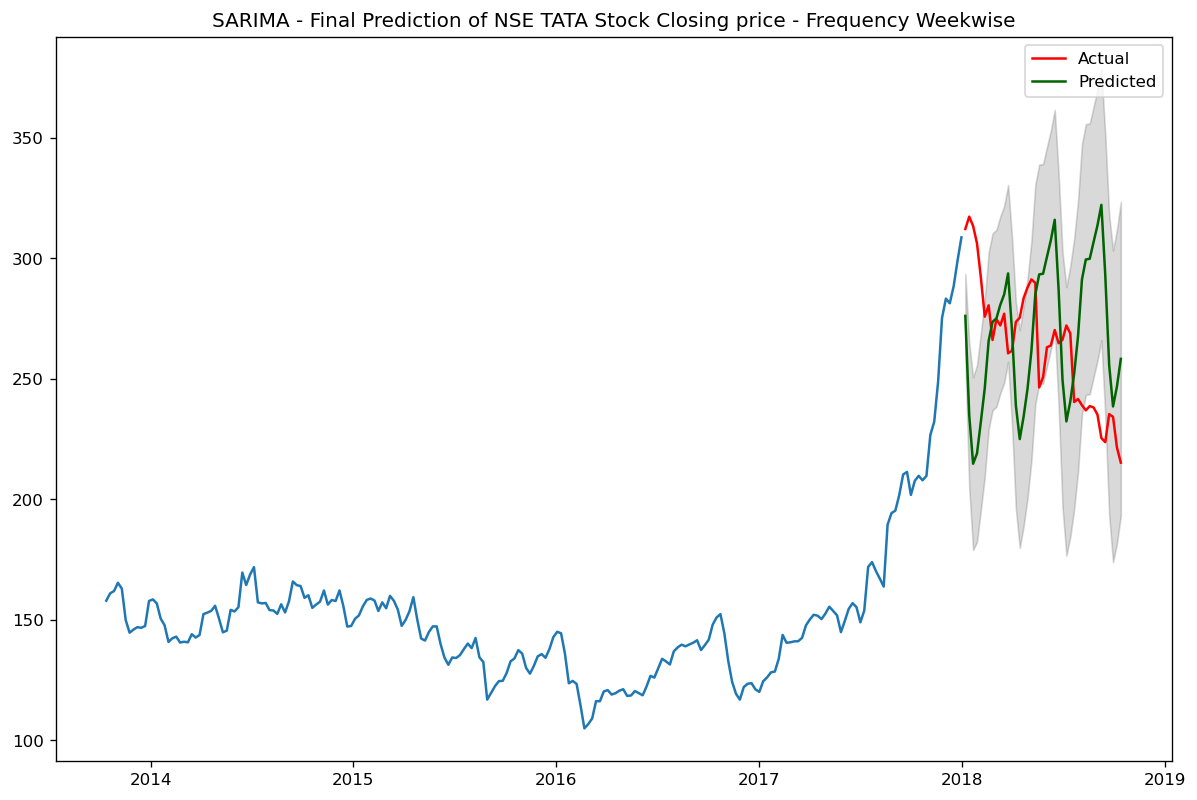

MAPE:  0.152
Accuracy:  0.848
MAE:  39.727
RMSE:  47.381


In [411]:
sarimax_plot_eval_prediction(sarima__week_model,train_week_mean,test_week_wise,seasn_daywise[["seasonal"]],12,"Weekwise")

## Monthwise

In [412]:
result_mul_monthwise = seasonal_decompose(train_mon_mean[['Close']],model='multiplicative',period=12,extrapolate_trend='freq')
seasn_monthwise = result_mul_monthwise.seasonal

In [413]:
seasn_monthwise=pd.DataFrame(seasn_monthwise).reset_index()

In [414]:
# SARIMAX Model - Weekwise
sarima_mon_model = pm.auto_arima(train_mon_mean[['Close']], exogenous=seasn_monthwise[['seasonal']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sarima_mon_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.04 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=330.337, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=324.567, Time=0.32 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=323.822, Time=0.33 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=330.115, Time=0.11 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=324.924, Time=0.39 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=324.350, Time=0.60 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=325.379, Time=0.29 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.86 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=324.972, Time=0.37 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=inf, Time=0.97 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=1.36 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.83 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
Total fit

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   51
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -157.911
Date:                            Tue, 19 Apr 2022   AIC                            323.822
Time:                                    03:22:53   BIC                            330.372
Sample:                                         0   HQIC                           326.153
                                             - 51                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
seasonal   -8.395e-05   8.82e+04  -9.52e-10      1.000   -1.73e+05    1.73e+05
ma.L1          0.2661      0.209      1.272      0.203      -0.144       0.676
ma.S.L12      -0.8126      1.771     -0.459      0.646      -4.284       2.658
sigma2       180.0050    273.760      0.658      0.511    -356.555     716.565
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                31.82
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               3.65   Skew:                             1.19
Prob(H) (two-sided):                  0.03   Kurtosis:                         6.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [415]:
sarima_mon_model.aic()

323.8220204188484

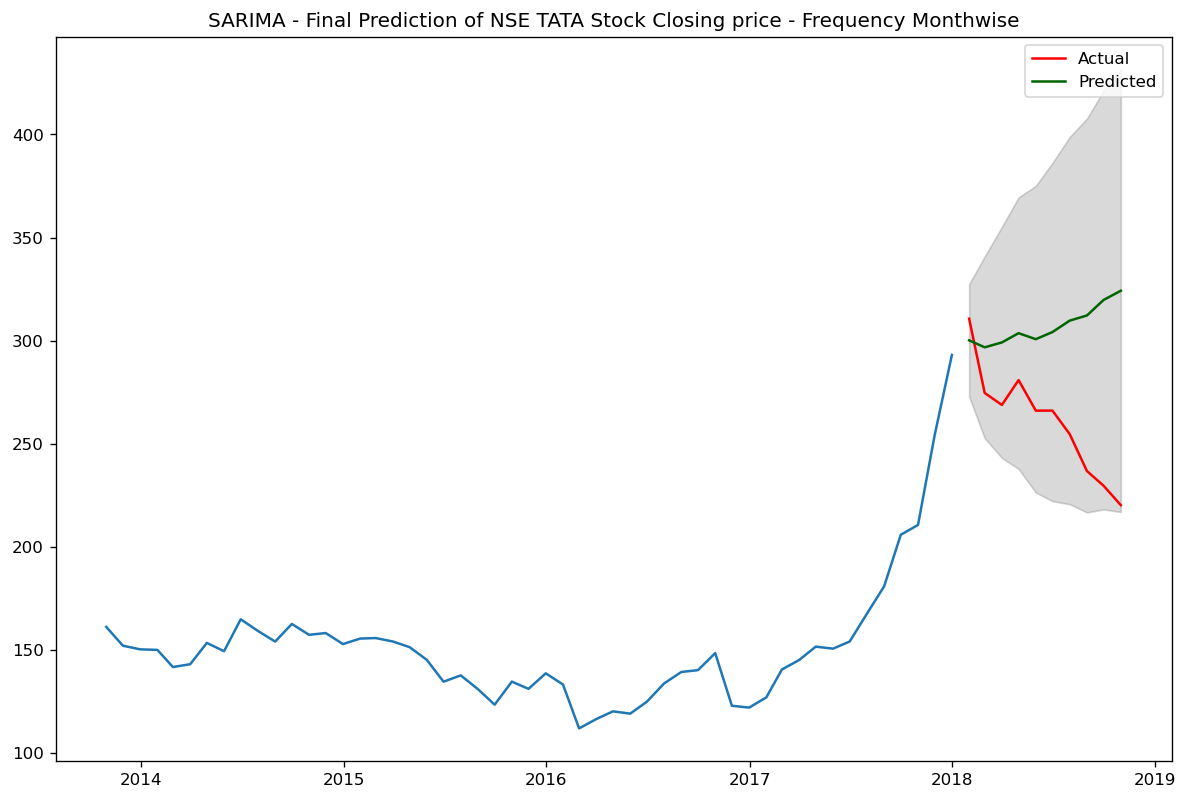

MAPE:  0.198
Accuracy:  0.802
MAE:  48.307
RMSE:  56.871


In [416]:
sarimax_plot_eval_prediction(sarima_mon_model,train_mon_mean,test_month_wise,seasn_monthwise[["seasonal"]],12,"Monthwise")